# Overview

This is a noteboook for understanding the data and performing necessary data cleaning before we implement further advance analysis.

Data cleaning process includes:
* Deal with "Unknown" values
* Deal with missing values
* Remove "fine" categorical variables
* Decide which columns will need one-hot-encoding or extra engineering
* Make sure that all columns are numerical
* Fill missing values and scale the data

In [2]:
# import libraries here; add more as necessary
import os
import pickle 
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_columns', 100)
pd.set_option('max_rows', 400)

# magic word for producing visualizations in notebook
%matplotlib inline

# 1. Load data and understand the attributes

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In [2]:
now = datetime.datetime.now()
azdias = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';')
now1 = datetime.datetime.now()
print((now1 - now).seconds/60)

customers = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')
now2 = datetime.datetime.now()
print((now2 - now).seconds/60)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


6.85
7.75


In [5]:
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,...,ORTSGR_KLS9,OST_WEST_KZ,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_GBZ,PLZ8_HHZ,PRAEGENDE_JUGENDJAHRE,REGIOTYP,RELAT_AB,RETOURTYP_BK_S,RT_KEIN_ANREIZ,RT_SCHNAEPPCHEN,RT_UEBERGROESSE,SEMIO_DOM,SEMIO_ERL,SEMIO_FAM,SEMIO_KAEM,SEMIO_KRIT,SEMIO_KULT,SEMIO_LUST,SEMIO_MAT,SEMIO_PFLICHT,SEMIO_RAT,SEMIO_REL,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,SOHO_KZ,STRUKTURTYP,TITEL_KZ,UMFELD_ALT,UMFELD_JUNG,UNGLEICHENN_FLAG,VERDICHTUNGSRAUM,VERS_TYP,VHA,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,607152,-1,9.0,20.0,NaN,NaN,NaN,NaN,20.0,2.0,0.0,0.0,1.0,2.0,0.0,2.0,6.0,3C,3,24,4.0,4.0,4.0,4.0,3.0,2.0,4.0,3.0,0,0,10,0,0,0,10,10,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.0,W,3.0,2.0,0.0,0.0,1.0,5.0,5.0,15,3.0,1.0,1.0,5.0,5.0,3.0,1,2,7,1,1,7,2,5,4,4,7,7,5,7,0,0.0,3.0,0.0,5.0,1.0,0.0,3.0,1,0.0,3.0,8.0,11.0,8.0,6.0,8.0,7.0,5,1,1
1,825209,1,4.0,15.0,NaN,NaN,NaN,NaN,13.0,2.0,0.0,0.0,2.0,2.0,0.0,2.0,1.0,4D,4,24,1.0,3.0,2.0,1.0,3.0,4.0,4.0,5.0,0,0,10,0,0,0,10,10,0.0,0,0,0,0,0,0,0,0,0,0,0,2,2,...,5.0,W,3.0,3.0,1.0,0.0,1.0,4.0,3.0,9,6.0,1.0,5.0,1.0,5.0,5.0,3,3,5,3,3,4,5,1,2,1,3,6,2,6,0,0.0,3.0,0.0,3.0,2.0,1.0,0.0,1,0.0,2.0,3.0,6.0,5.0,4.0,8.0,5.0,4,1,4
2,631021,-1,5.0,0.0,NaN,NaN,NaN,NaN,NaN,12.0,0.0,0.0,1.0,11.0,0.0,2.0,3.0,5B,5,32,4.0,4.0,5.0,5.0,3.0,3.0,2.0,4.0,0,0,10,0,0,0,10,10,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4.0,W,2.0,3.0,2.0,1.0,1.0,3.0,3.0,14,6.0,1.0,4.0,5.0,4.0,4.0,1,1,7,2,2,7,2,5,6,4,7,7,5,6,0,0.0,3.0,0.0,3.0,3.0,0.0,0.0,1,0.0,4.0,6.0,9.0,8.0,6.0,3.0,3.0,3,1,1
3,920988,-1,9.0,16.0,10.0,12.0,NaN,NaN,23.0,6.0,0.0,2.0,2.0,5.0,0.0,4.0,1.0,9D,9,51,4.0,3.0,5.0,5.0,3.0,1.0,2.0,3.0,0,0,8,0,6,0,10,10,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2,...,8.0,W,1.0,4.0,3.0,2.0,4.0,3.0,5.0,14,7.0,3.0,1.0,5.0,5.0,NaN,5,7,6,6,7,5,7,3,7,4,7,5,2,2,-1,0.0,3.0,0.0,4.0,4.0,1.0,1.0,-1,0.0,4.0,4.0,7.0,6.0,1.0,6.0,3.0,3,2,3
4,647012,2,1.0,12.0,NaN,NaN,NaN,NaN,12.0,1.0,0.0,0.0,2.0,2.0,0.0,3.0,6.0,2C,2,14,3.0,1.0,2.0,1.0,5.0,4.0,5.0,5.0,0,0,10,0,0,0,10,10,0.0,0,6,6,3,6,2,0,6,0,0,0,4,5,...,4.0,W,2.0,3.0,1.0,0.0,1.0,4.0,3.0,6,3.0,1.0,5.0,1.0,4.0,2.0,3,3,4,2,3,4,5,1,1,3,5,4,1,6,0,0.0,2.0,0.0,2.0,5.0,0.0,0.0,1,5.0,3.0,4.0,4.0,2.0,6.0,9.0,3.0,1,1,4


> ### Take a look at the attributes

We will take a look at the attributes and see which are numerical variables, which are categorical variables and which categorical variables are ordinal (so that we don't need to one-hot-encode them).

In [28]:
attribute_values = pd.read_excel("DIAS Attributes - Values 2017.xlsx")
attribute_levels = pd.read_excel("DIAS Information Levels - Attributes 2017.xlsx")

"""
Format the attribute_values data a little bit ...
"""
now = datetime.datetime.now()
x = ""
for i in range(len(attribute_values)):
    if str(attribute_values['Attribute'].iloc[i]) != "nan":
        x = attribute_values['Attribute'].iloc[i]
    else:
        attribute_values['Attribute'].iloc[i] = x
print((now1 - now).seconds/60)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1435.5833333333333


In [12]:
attribute_values['value__meaning'] = attribute_values['Value'].apply(str) + '__' + attribute_values['Meaning']

In [13]:
attribute_values.to_csv("attribute_values_cleaned_checkpoint.csv", index=False)

### Load Checkpoint

In [3]:
attribute_values = pd.read_csv("attribute_values_cleaned_checkpoint.csv")
attribute_values.shape

(2258, 6)

In [10]:
attribute_levels.sample(frac=1)

,Unnamed: 0,Information level,Attribute,Description,Additional notes
82,NaN,NaN,MIN_GEBAEUDEJAHR,year the building was first mentioned in our database,NaN
304,NaN,NaN,PLZ8_ANTG4,number of >10 family houses in the PLZ8,NaN
68,NaN,NaN,D19_VERSI_ONLINE_DATUM,actuality of the last transaction for the segment insurance ONLINE,NaN
11,NaN,NaN,GEBURTSJAHR,year of birth,NaN
24,NaN,NaN,SEMIO_SOZ,affinity indicating in what way the person is social minded,attributes in cooperation with Kantar TNS; the information basis is a consumer survey
286,NaN,NaN,KBA13_SEG_SPORTWAGEN,share of sportscars within the PLZ8,NaN
102,NaN,NaN,KBA05_CCM4,share of cars with more than 2499ccm,NaN
83,NaN,NaN,OST_WEST_KZ,flag indicating the former GDR/FRG,NaN
38,NaN,NaN,SHOPPER_TYP,shopping typology,NaN
97,NaN,Microcell (RR3_ID),KBA05_AUTOQUOT,share of cars per household,NaN


In [5]:
attribute_levels = pd.read_excel("DIAS Information Levels - Attributes 2017.xlsx")

In [5]:
attribute_values.groupby('Attribute')['value__meaning'].apply(list).reset_index().sample(5)

,Attribute,value__meaning
196,KBA13_HALTER_55,"[-1__unknown, 0__none, 1__very low, 2__low, 3__average, 4__high, 5__very high]"
208,KBA13_KMH_140,"[-1__unknown, 0__none, 1__very low, 2__low, 3__average, 4__high, 5__very high]"
127,KBA05_KW3,"[-1, 9__unknown, 0__none, 1__low, 2__average, 3__high, 4__very high]"
175,KBA13_CCM_1400,"[-1__unknown, 0__none, 1__very low, 2__low, 3__average, 4__high, 5__very high]"
307,TITEL_KZ,"[-1, 0__unknown, 1__Dr., 2__Dr. Dr., 3__Prof., 4__Prof. Dr., 5__other]"


> ## 1.1 Deal with "Unknown" values

We can see that the values -1, 0, 9 usually mean "unknown" or other uncommon things. We need to code the "unknown" values as `NaN`.

In [6]:
def code_unknown_to_nan(data, attribute_values=attribute_values):
    """
    Code numbers that represent "unknown" values to NaN
    """
    attribute_values_unknown = attribute_values[attribute_values['Meaning'] == "unknown"]
    for i in range(len(attribute_values_unknown)):
        colname = attribute_values_unknown.iloc[i]['Attribute']
        unknown_values = eval('[' + str(attribute_values_unknown.iloc[i]['Value']) + ']')
        try:
            data[colname] = data[colname].replace(unknown_values, float('nan'))
        except:
            pass
    return data

In [7]:
azdias = code_unknown_to_nan(azdias)
azdias.shape

(891221, 366)

> ## 1.2 Deal with missing values

We'd like to drop columns with more than 40% missing rates.

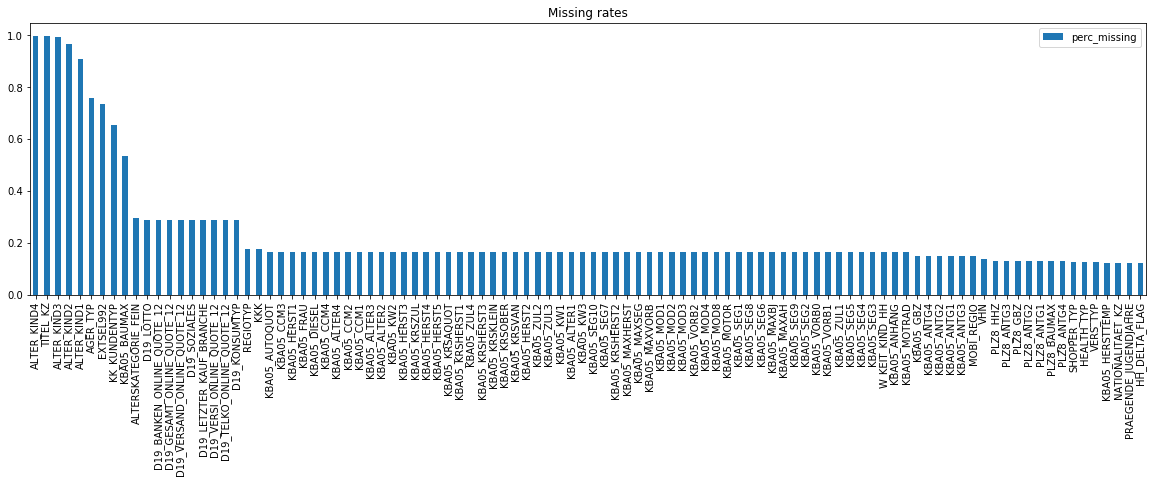

In [31]:
#Display the missing rates of the columns with the most 

plt.rcParams['figure.figsize'] = (20, 5)
missing_rates = pd.DataFrame(azdias.isna().mean().sort_values(ascending=False))[:100]\
                .rename({0:'perc_missing'}, axis=1)\
                .sort_values('perc_missing', ascending=False)
missing_rates.plot.bar(title="Missing rates")

In [32]:
#columns with highest missing rates
pd.DataFrame(azdias.isna().mean().sort_values(ascending=False)).reset_index()\
.rename({'index':'Attribute'}, axis=1)\
.merge(attribute_levels[['Attribute','Description']], on="Attribute")[:10]

,Attribute,0,Description
0,TITEL_KZ,0.997576,flag whether this person holds an academic title
1,AGER_TYP,0.760196,best-ager typology
2,KBA05_BAUMAX,0.534687,most common building-type within the cell
3,D19_KONSUMTYP,0.288495,consumption type
4,D19_VERSAND_ONLINE_QUOTE_12,0.288495,amount of online transactions within all transactions in the segment mail-order
5,D19_GESAMT_ONLINE_QUOTE_12,0.288495,amount of online transactions within all transactions in the complete file
6,D19_BANKEN_ONLINE_QUOTE_12,0.288495,amount of online transactions within all transactions in the segment bank
7,REGIOTYP,0.177357,AZ neighbourhood typology
8,KKK,0.177357,purchasing power
9,KBA05_AUTOQUOT,0.166193,share of cars per household


In [8]:
def remove_cols_high_missing_rates(data, min_missing_rate=0.4):
    """
    Remove columns with missing rates more than min_missing_rate
    """
    cols_keep = list(data.isna().mean()[data.isna().mean() < min_missing_rate].index)
    return data[cols_keep], cols_keep

In [9]:
azdias, cols_keep1 = remove_cols_high_missing_rates(azdias)

In [10]:
azdias.shape

(891221, 357)

> ## 1.3 Remove "Fine" categorical variables

Then we want to have a look at the categorical variables that need to be one-hot-encoded. This actually requires some manual screening ...

We discovered that some of attributes have 2 versions -- fine and rough. The fine version attributes will have very granular information --- which means, they usualy have too many levels. So we want to remove the "fine" categorical variables.

In [11]:
def remove_fine_cols(data):
    cols_keep = [i for i in list(data.columns) if not i.endswith("_FEIN")]
    data = data[cols_keep]
    return data, cols_keep

In [12]:
azdias, cols_keep2 = remove_fine_cols(azdias)
azdias.shape

(891221, 353)

> ## 1.4 Decide which columns will need one-hot-encoding or extra engineering

We now want to check which columns will need one-hot-encoding or extra engineering. If a column is numeric or ordinal, we can use that column directly. For categorical columns that are not ordinal, we would want to one-hot-encode them.

After some manual screening ... we decided that -->
<br>
* `CAMEO_DEU_2015` --> the labels for this attribute is like "1A, 1B, 2A, 2B, 2C ... "; We will only keep the digit part, which means that "1A" will be changed to "1";
* `CAMEO_DEUG_2015`, `CAMEO_INTL_2015` --> change this columns to numeric columns and set "XX" as NaN
* `PRAEGENDE_JUGENDJAHRE` --> we will decompose this column this way : '40ies - reconstruction years (Avantgarde, O+W)' ---> "40ies", "Avantgarde"; We will create 2 new columns based on the meanings of the labels and them create one-hot-coding dataframe for these 2 new columns;
* **one-hot-encoding** columns: 'CJT_GESAMTTYP','D19_KONSUMTYP','GFK_URLAUBERTYP','HEALTH_TYP','LP_LEBENSPHASE_GROB','SHOPPER_TYP','ZABEOTYP'

In [13]:
def label_to_meaning(attribute, attribute_values=attribute_values):
    """
    Create a dictionary to map attribute labels to meanings
    """
    attribute_values_1 = attribute_values[attribute_values['Attribute'] == attribute]
    result = {}
    for i in range(len(attribute_values_1)):
        result[attribute_values_1.iloc[i]["Value"]] = attribute_values_1.iloc[i]["Meaning"]
    return result

In [138]:
label_to_meaning("PRAEGENDE_JUGENDJAHRE")

{'-1, 0': 'unknown',
 '1': '40ies - war years (Mainstream, O+W)',
 '2': '40ies - reconstruction years (Avantgarde, O+W)',
 '3': '50ies - economic miracle (Mainstream, O+W)',
 '4': '50ies - milk bar / Individualisation (Avantgarde, O+W)',
 '5': '60ies - economic miracle (Mainstream, O+W)',
 '6': '60ies - generation 68 / student protestors (Avantgarde, W)',
 '7': '60ies - opponents to the building of the Wall (Avantgarde, O)',
 '8': '70ies - family orientation (Mainstream, O+W)',
 '9': '70ies - peace movement (Avantgarde, O+W)',
 '10': '80ies - Generation Golf (Mainstream, W)',
 '11': '80ies - ecological awareness (Avantgarde, W)',
 '12': '80ies - FDJ / communist party youth organisation (Mainstream, O)',
 '13': '80ies - Swords into ploughshares (Avantgarde, O)',
 '14': '90ies - digital media kids (Mainstream, O+W)',
 '15': '90ies - ecological awareness (Avantgarde, O+W)'}

In [14]:
def engineer_cat_cols(data, attribute_values=attribute_values):
    """
    Perform ad-hoc transformation on selected attributes:
    """
    data['CAMEO_DEU_2015'] = data['CAMEO_DEU_2015']\
                             .replace("XX", float('nan'))\
                             .apply(lambda x: x if str(x) == "nan" else str(x)[0])
    data['CAMEO_DEUG_2015'] = data['CAMEO_DEUG_2015'].replace("X", np.float('nan')).astype("float")
    data['CAMEO_INTL_2015'] = data['CAMEO_INTL_2015'].replace("XX", np.float('nan')).astype("float")
    
    def custom_split1(x):
        x = str(x)
        try:
            splits1 = x.split(" - ")
            splits2 = splits1[1].split(" (")
            splits3 = splits2[1].split(", ")
            return [splits1[0], splits3[0]]
        except:
            return x
    
    PRAEGENDE_JUGENDJAHRE_dict = label_to_meaning("PRAEGENDE_JUGENDJAHRE")
    PRAEGENDE_JUGENDJAHRE_temp = data['PRAEGENDE_JUGENDJAHRE']\
                                 .apply(lambda x: PRAEGENDE_JUGENDJAHRE_dict[str(int(x))] if str(x) != "nan" else x)
    data['PRAEGENDE_JUGENDJAHRE_part1'] = PRAEGENDE_JUGENDJAHRE_temp\
                                          .apply(lambda x: custom_split1(x)[0] if str(x) != "nan" else x)
    data['PRAEGENDE_JUGENDJAHRE_part2'] = PRAEGENDE_JUGENDJAHRE_temp\
                                          .apply(lambda x: custom_split1(x)[1] if str(x) != "nan" else x)
    data = data\
           .join(pd.get_dummies(data[['PRAEGENDE_JUGENDJAHRE_part1','PRAEGENDE_JUGENDJAHRE_part2']]))\
           .drop(['PRAEGENDE_JUGENDJAHRE','PRAEGENDE_JUGENDJAHRE_part1','PRAEGENDE_JUGENDJAHRE_part2'], axis=1)
    
    one_hot_encode_cols = ['CJT_GESAMTTYP',
                           'D19_KONSUMTYP',
                           'GFK_URLAUBERTYP',
                           'HEALTH_TYP',
                           'LP_LEBENSPHASE_GROB',
                           'SHOPPER_TYP',
                           'ZABEOTYP']
    
    
    data = data\
           .join(pd.get_dummies(data[one_hot_encode_cols].astype("object"), dummy_na=False))\
           .drop(one_hot_encode_cols, axis=1)
    
    return data

In [15]:
azdias = engineer_cat_cols(azdias)
azdias.shape

(891221, 404)

> ## 1.5 Make sure that all columns are numerical

In [3]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 404 entries, LNR to ZABEOTYP_6
dtypes: float64(256), int64(145), object(3)
memory usage: 2.7+ GB


In [98]:
azdias.select_dtypes("object").head()

,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ
0,D19_UNBEKANNT,2005-12-16 00:00:00,W
1,D19_KINDERARTIKEL,1996-06-26 00:00:00,W
2,D19_VERSICHERUNGEN,1992-02-10 00:00:00,W
3,D19_VERSICHERUNGEN,1992-02-12 00:00:00,W
4,D19_BUCH_CD,1992-02-12 00:00:00,W


We believe that the columns that are object types are not very useful. We'd rather drop these 3 columns than performing feature engineering on these columns which may take extra time to run.

In [4]:
azdias = azdias.drop(['D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ'], axis=1)

In [5]:
azdias = azdias.set_index("LNR").astype("float")

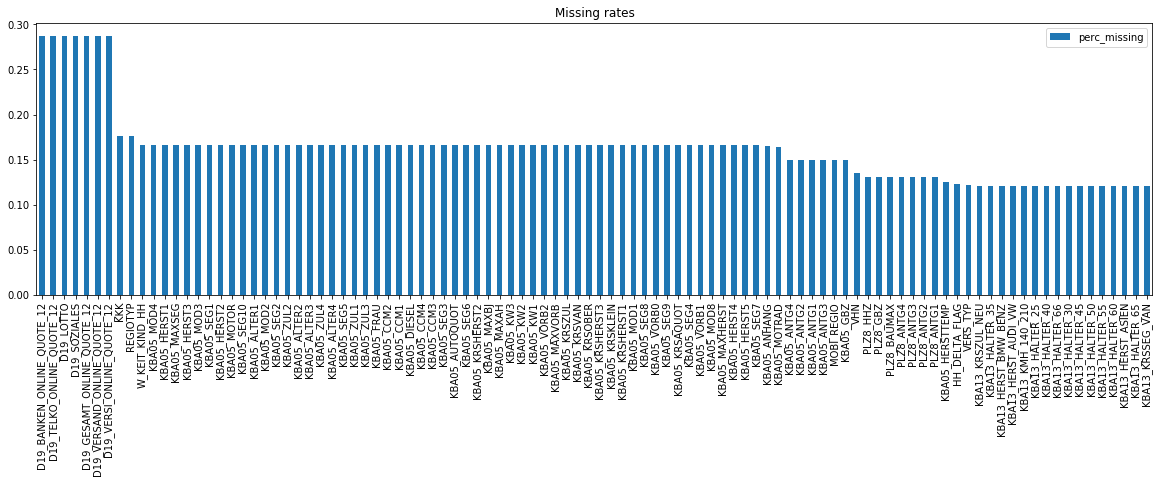

In [106]:
plt.rcParams['figure.figsize'] = (20, 5)
missing_rates = pd.DataFrame(azdias.isna().mean().sort_values(ascending=False))[:100]\
                .rename({0:'perc_missing'}, axis=1)\
                .sort_values('perc_missing', ascending=False)
missing_rates.plot.bar(title="Missing rates")

In [11]:
azdias.shape

(891221, 400)

In [89]:
##Because the process took so long, we checkpointed the data
azdias = pd.read_csv("azdias_checkpoint_0307.csv")

In [91]:
azdias = azdias.set_index('LNR')

In [92]:
azdias.shape

(891221, 400)

> ## 1.6 Fill missing values and scale the data

We will fit `Imputer` and `StandardScaler` on the general population data. Later when 

In [93]:
imputer = Imputer(missing_values=float('nan'), strategy="mean", axis=0).fit(azdias)
azdias_1 = imputer.transform(azdias)

pd.DataFrame(azdias_1).to_csv("azdias_checkpoint_0307.csv")

/Users/tianyiwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [94]:
#checkpoint the imputer

with open("imputer.p", 'wb') as pickle_file:
    pickle.dump(imputer, pickle_file)

In [95]:
scaler = StandardScaler().fit(azdias_1)
azdias_1 = scaler.transform(azdias_1)

pd.DataFrame(azdias_1).to_csv("azdias_checkpoint_0307.csv")

In [96]:
azdias_1.shape

(891221, 400)

In [97]:
#checkpoint the scaler

with open("scaler.p", 'wb') as pickle_file:
    pickle.dump(scaler, pickle_file)

In [98]:
azdias_new = pd.DataFrame(azdias_1, index=azdias.index, columns=azdias.columns) 

In [100]:
azdias_new.reset_index().to_csv("azdias_checkpoint_0307.csv", index=False)

In [102]:
azdias_new.shape

(891221, 400)

# 2. Productionize

Apply the same transformations to the customer data

In [101]:
file = open("imputer.p", 'rb')
saved_imputer = pickle.load(file)
file.close()

file = open("scaler.p", 'rb')
saved_scaler = pickle.load(file)
file.close()

In [27]:
customers = pd.read_csv("customers.csv")
attribute_values = pd.read_csv("attribute_values_cleaned_checkpoint.csv")

In [103]:
len(customers.columns)

369

In [115]:
class DataPreparation:


    def __init__(self, 
                     attribute_values,
                     imputer,
                     scaler,
                     final_cols=list(azdias_new.columns)):
        """
        Data Preparation, including:
        * Deal with "Unknown" values
        * Deal with missing values
        * Remove "fine" categorical variables
        * Decide which columns will need one-hot-encoding or extra engineering
        * Make sure that all columns are numerical
        * Fill missing values and scale the data
        
        params: 
        attribute_values: the table with the description of the attributes ("attribute_values_cleaned_checkpoint.csv")
        imputer: the fitted imputer
        scaler: the fitted scaler
        final_cols: final columns
        """
        self.attribute_values = attribute_values
        self.imputer = imputer
        self.scaler = scaler
        self.final_cols = final_cols

    @staticmethod
    def code_unknown_to_nan(data, attribute_values):
        """
        Code numbers that represent "unknown" values to NaN
        """
        attribute_values_unknown = attribute_values[attribute_values['Meaning'] == "unknown"]
        for i in range(len(attribute_values_unknown)):
            colname = attribute_values_unknown.iloc[i]['Attribute']
            unknown_values = eval('[' + str(attribute_values_unknown.iloc[i]['Value']) + ']')
            try:
                data[colname] = data[colname].replace(unknown_values, float('nan'))
            except:
                pass
        return data


    @staticmethod
    def remove_cols_high_missing_rates(data, min_missing_rate=0.4):
        """
        Remove columns with missing rates more than min_missing_rate
        """
        cols_keep = list(data.isna().mean()[data.isna().mean() < min_missing_rate].index)
        return data[cols_keep], cols_keep


    @staticmethod
    def remove_fine_cols(data):
        cols_keep = [i for i in list(data.columns) if not i.endswith("_FEIN")]
        data = data[cols_keep]
        return data, cols_keep


    @staticmethod
    def label_to_meaning(attribute, attribute_values):
        """
        Create a dictionary to map attribute labels to meanings
        """
        attribute_values_1 = attribute_values[attribute_values['Attribute'] == attribute]
        result = {}
        for i in range(len(attribute_values_1)):
            result[attribute_values_1.iloc[i]["Value"]] = attribute_values_1.iloc[i]["Meaning"]
        return result


    def engineer_cat_cols(self, data, attribute_values):
        """
        Perform ad-hoc transformation on selected attributes:
        """
        data['CAMEO_DEU_2015'] = data['CAMEO_DEU_2015']\
                                                 .replace("XX", float('nan'))\
                                                 .apply(lambda x: x if str(x) == "nan" else str(x)[0])
        data['CAMEO_DEUG_2015'] = data['CAMEO_DEUG_2015'].replace("X", np.float('nan')).astype("float")
        data['CAMEO_INTL_2015'] = data['CAMEO_INTL_2015'].replace("XX", np.float('nan')).astype("float")
        
        def custom_split1(x):
            x = str(x)
            try:
                splits1 = x.split(" - ")
                splits2 = splits1[1].split(" (")
                splits3 = splits2[1].split(", ")
                return [splits1[0], splits3[0]]
            except:
                return x
        
        PRAEGENDE_JUGENDJAHRE_dict = self.label_to_meaning("PRAEGENDE_JUGENDJAHRE", attribute_values)
        PRAEGENDE_JUGENDJAHRE_temp = data['PRAEGENDE_JUGENDJAHRE']\
                                     .apply(lambda x: PRAEGENDE_JUGENDJAHRE_dict[str(int(x))] if str(x) != "nan" else x)
        data['PRAEGENDE_JUGENDJAHRE_part1'] = PRAEGENDE_JUGENDJAHRE_temp\
                                              .apply(lambda x: custom_split1(x)[0] if str(x) != "nan" else x)
        data['PRAEGENDE_JUGENDJAHRE_part2'] = PRAEGENDE_JUGENDJAHRE_temp\
                                              .apply(lambda x: custom_split1(x)[1] if str(x) != "nan" else x)
        data = data\
               .join(pd.get_dummies(data[['PRAEGENDE_JUGENDJAHRE_part1','PRAEGENDE_JUGENDJAHRE_part2']]))\
               .drop(['PRAEGENDE_JUGENDJAHRE','PRAEGENDE_JUGENDJAHRE_part1','PRAEGENDE_JUGENDJAHRE_part2'], axis=1)
        
        one_hot_encode_cols = ['CJT_GESAMTTYP',
                               'D19_KONSUMTYP',
                               'GFK_URLAUBERTYP',
                               'HEALTH_TYP',
                               'LP_LEBENSPHASE_GROB',
                               'SHOPPER_TYP',
                               'ZABEOTYP']
        
        
        data = data\
               .join(pd.get_dummies(data[one_hot_encode_cols].astype("object"), dummy_na=False))\
               .drop(one_hot_encode_cols, axis=1)
        
        return data


    def pre_fit(self, data):

        data = self.code_unknown_to_nan(data, self.attribute_values)
        data, cols_keep1 = self.remove_cols_high_missing_rates(data)
        data, cols_keep2 = self.remove_fine_cols(data)
        data  = self.engineer_cat_cols(data, self.attribute_values)
        data = data[self.final_cols]
        
        self.index = data.index

        return data


    def fit(self, data):

        data = self.pre_fit(data)
        self.imputer = Imputer(missing_values=float('nan'), strategy="mean", axis=0).fit(data)
        data = self.imputer.transform(data)
        self.scaler = StandardScaler().fit(data)


    def transform(self, new_data):

        new_data = self.pre_fit(new_data)
        
        self.colnames = new_data.columns
        self.index = new_data.index
        
        new_data = self.imputer.transform(new_data)
        new_data = self.scaler.transform(new_data)

        return new_data

In [116]:
dp = DataPreparation(attribute_values, imputer=saved_imputer, scaler=saved_scaler)

In [120]:
customers_transformed = dp.transform(customers)

In [123]:
customers_transformed.shape

(191652, 400)

In [130]:
pd.DataFrame(customers_transformed, columns=dp.final_cols).to_csv("customers_transformed_0308.csv", index=False)

In [133]:
#checkpoint final columns

with open("fianl_cols.p", 'wb') as pickle_file:
    pickle.dump(dp.final_cols, pickle_file)